# Tabular models

In [1]:
from fastai import *
from fastai.tabular import *
from tqdm import tqdm_notebook as tqdm

Tabular data should be in a Pandas `DataFrame`.

In [2]:
path = Path('../Data/Cat-in-the-dat/') #untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
sample = pd.read_csv(path/'sample_submission.csv')

In [3]:
path

PosixPath('../Data/Cat-in-the-dat')

In [4]:
df.tail()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
599995,599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,NaN,0
599996,599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,NaN,3.0,0
599997,599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0
599998,599998,1.0,1.0,0.0,F,Y,NaN,Polygon,Axolotl,NaN,...,c1a8374a0,1.0,Master,Warm,m,X,Ey,1.0,5.0,0
599999,599999,0.0,0.0,0.0,T,N,Blue,Triangle,Dog,Russia,...,e2aea7784,1.0,Contributor,Boiling Hot,b,O,uI,5.0,8.0,0


In [5]:
test_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


## Do some EDA

In [6]:
df.id.nunique()

600000

In [7]:
df.bin_0.nunique(), df.bin_1.nunique(), df.bin_2.nunique(), df.bin_3.nunique(), df.bin_4.nunique()

(2, 2, 2, 2, 2)

In [8]:
df.nom_0.nunique(), df.nom_1.nunique(), df.nom_2.nunique(), df.nom_3.nunique(), df.nom_4.nunique(), df.nom_5.nunique(), df.nom_6.nunique(), df.nom_7.nunique(), df.nom_8.nunique(), df.nom_9.nunique(), 

(3, 6, 6, 6, 4, 1220, 1519, 222, 222, 2218)

In [9]:
df.ord_0.nunique(), df.ord_1.nunique(), df.ord_2.nunique(), df.ord_3.nunique(), df.ord_4.nunique(), df.ord_5.nunique() 

(3, 5, 6, 15, 26, 190)

In [10]:
df.day.nunique(), df.month.nunique()

(7, 12)

In [11]:
df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [12]:
dep_var = 'target'
cat_names = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
             'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8',
             'nom_9','ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5',
             'day', 'month']
cont_names = ['id']
procs = [FillMissing, Categorify, Normalize]

In [13]:
df.bin_0.dtype

dtype('float64')

In [14]:
embed = {}
for col in cat_names:
#     print(col)
    if df[col].nunique() < 50:
        embed[col] = 50

In [15]:
embed

{'bin_0': 50,
 'bin_1': 50,
 'bin_2': 50,
 'bin_3': 50,
 'bin_4': 50,
 'nom_0': 50,
 'nom_1': 50,
 'nom_2': 50,
 'nom_3': 50,
 'nom_4': 50,
 'ord_0': 50,
 'ord_1': 50,
 'ord_2': 50,
 'ord_3': 50,
 'ord_4': 50,
 'day': 50,
 'month': 50}

In [16]:
len(cat_names)

23

In [17]:
test = TabularList.from_df(test_df, path=path, cat_names=cat_names, cont_names=cont_names)#, procs=procs)

In [18]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(590000,599999)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch(bs=2048))

In [19]:
data.show_batch(rows=5)

bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,id,target
0.0,0.0,0.0,F,Y,Blue,Trapezoid,Dog,Finland,Oboe,9b187680f,451bfb962,728490578,529b40fe8,0200cc375,1.0,Expert,Hot,d,R,gt,7.0,5.0,-0.2611,0
0.0,0.0,0.0,F,Y,Red,Polygon,Axolotl,Canada,Theremin,58bdf8adb,f29141e07,c5f7d2efd,cb0d7da76,bf794a0b8,3.0,Novice,Lava Hot,o,N,Nh,7.0,6.0,1.6826,0
0.0,0.0,1.0,F,N,Red,Circle,Axolotl,Finland,Bassoon,eb14e41b5,0ed3c203f,1bf2f7824,cf30695f0,03861ef63,2.0,Novice,Freezing,n,Q,iS,#na#,2.0,1.2954,0
0.0,1.0,0.0,F,Y,Blue,Triangle,Dog,Russia,Theremin,726a7a9ce,d81becf45,3f63ecb96,10fd52d10,33ff32f40,1.0,Contributor,Hot,c,P,iS,6.0,1.0,-1.5019,0
#na#,0.0,0.0,F,Y,Red,Trapezoid,Dog,Costa Rica,Bassoon,34b74d040,47c84dc6c,c9aaf28b7,1a59581be,15c90ab2e,3.0,Expert,Warm,a,I,#na#,2.0,7.0,-1.2862,0


In [20]:
# learn = tabular_learner(data, layers=[300,200,100], metrics=accuracy)

learn = tabular_learner(data, layers=[300,200,100],emb_szs=embed, emb_drop=0.3,ps=0.3, metrics=accuracy)

In [21]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 50)
    (1): Embedding(3, 50)
    (2): Embedding(3, 50)
    (3): Embedding(3, 50)
    (4): Embedding(3, 50)
    (5): Embedding(4, 50)
    (6): Embedding(7, 50)
    (7): Embedding(7, 50)
    (8): Embedding(7, 50)
    (9): Embedding(5, 50)
    (10): Embedding(1221, 86)
    (11): Embedding(1520, 97)
    (12): Embedding(223, 33)
    (13): Embedding(223, 33)
    (14): Embedding(2219, 120)
    (15): Embedding(4, 50)
    (16): Embedding(6, 50)
    (17): Embedding(7, 50)
    (18): Embedding(16, 50)
    (19): Embedding(27, 50)
    (20): Embedding(191, 30)
    (21): Embedding(8, 50)
    (22): Embedding(13, 50)
  )
  (emb_drop): Dropout(p=0.3)
  (bn_cont): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=1250, out_features=300, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3)

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-02
Min loss divided by 10: 2.09E-02


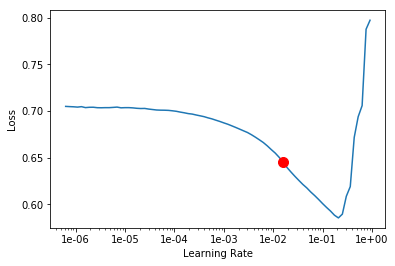

In [23]:
learn.recorder.plot(suggestion=True)

In [24]:
data.batch_size

2048

In [25]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.405505,0.396804,0.825383,00:56
1,0.402549,0.394260,0.828783,00:55
2,0.399933,0.394299,0.826983,00:52
3,0.395518,0.394711,0.826383,00:55
4,0.394638,0.395069,0.826483,00:56


In [35]:
learn.unfreeze()

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


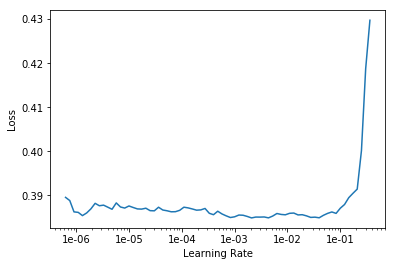

In [37]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(5, 1e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.387385,0.394684,0.826183,00:55
1,0.384446,0.394681,0.826283,00:54
2,0.383932,0.394741,0.826483,00:53
3,0.385388,0.394616,0.826183,00:53
4,0.386374,0.394685,0.826183,00:49


## Inference

In [41]:
sample.head()

,id,target
0,600000,0
1,600001,0
2,600002,0
3,600003,0
4,600004,0


In [42]:
row = df.iloc[0]

In [43]:
DatasetType.Test

<DatasetType.Test: 3>

In [44]:
pred = learn.get_preds(DatasetType.Test)

In [45]:
pred[0]

tensor([[0.8787, 0.1213],
        [0.8222, 0.1778],
        [0.8248, 0.1752],
        ...,
        [0.4613, 0.5387],
        [0.6980, 0.3020],
        [0.8042, 0.1958]])

In [30]:
pred[0]

tensor([[0.8848, 0.1152],
        [0.8283, 0.1717],
        [0.8306, 0.1694],
        ...,
        [0.4474, 0.5526],
        [0.7022, 0.2978],
        [0.8164, 0.1836]])

In [49]:
def get_submision(preds):
    labelled_preds = []
    pred11 = preds
    for pred in tqdm(pred11):
        labelled_preds.append(int(np.argmax(pred)))
    
    sample['target'] = labelled_preds
    
    return sample

In [50]:
submission = get_submision(pred[0])

In [51]:
submission.reset_index(drop=True)

,id,target
0,600000,0
1,600001,0
2,600002,0
3,600003,0
4,600004,0
5,600005,0
6,600006,1
7,600007,0
8,600008,0
9,600009,0


In [52]:
submission.to_csv('./submission_2.csv',index=False)